<a href="https://www.kaggle.com/ajisofyan/prediction-model-lung-cancer-with-naive-bayes?scriptVersionId=88534674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
data = pd.read_csv("../input/survey-lung-cancer/survey_lung_cancer.csv")

In [3]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


In [4]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [5]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES
308,MALE,62,0,0,0,1,0,1,1,1,1,0,0,1,0,YES


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
data.isnull().values.any()

False

In [8]:
data.replace(" ", inplace = True)

GENDER                   None
AGE                      None
SMOKING                  None
YELLOW_FINGERS           None
ANXIETY                  None
PEER_PRESSURE            None
CHRONIC DISEASE          None
FATIGUE                  None
ALLERGY                  None
WHEEZING                 None
ALCOHOL CONSUMING        None
COUGHING                 None
SHORTNESS OF BREATH      None
SWALLOWING DIFFICULTY    None
CHEST PAIN               None
LUNG_CANCER              None
dtype: object

In [9]:
data["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

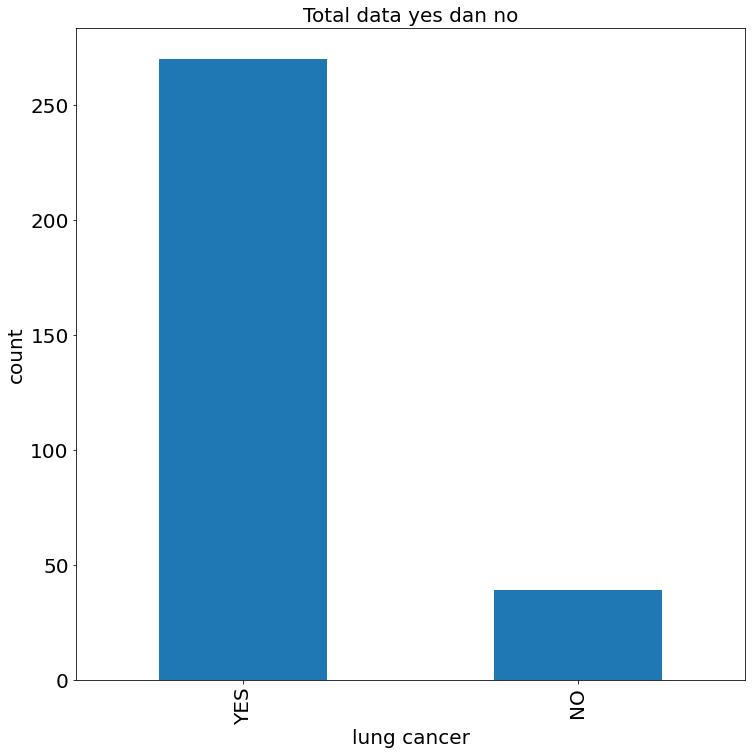

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.title("Total data yes dan no",fontsize=20)
plt.xlabel("lung cancer", fontsize=20)
plt.ylabel("count",fontsize=20)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=20)
plt.show()

In [11]:
data['GENDER'] = data['GENDER'].apply(lambda score: 1 if score=='MALE' else 0)

In [12]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda score: 1 if score=='YES' else 0)

In [13]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


In [15]:
x = data.iloc[:, [0,1,2, 3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data["LUNG_CANCER"].values

In [16]:
x

array([[ 1, 69,  0, ...,  1,  1,  1],
       [ 1, 74,  1, ...,  1,  1,  1],
       [ 0, 59,  0, ...,  1,  0,  1],
       ...,
       [ 1, 58,  1, ...,  0,  0,  1],
       [ 1, 67,  1, ...,  1,  0,  1],
       [ 1, 62,  0, ...,  0,  1,  0]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2 , random_state=10)

In [18]:
x_train.shape

(247, 15)

In [19]:
x_test.shape

(62, 15)

In [20]:
print(x_train)

[[ 1 64  1 ...  1  0  1]
 [ 0 63  1 ...  1  1  1]
 [ 0 71  1 ...  0  1  1]
 ...
 [ 0 48  0 ...  1  1  0]
 [ 0 53  0 ...  1  0  0]
 [ 0 60  1 ...  1  1  0]]


In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [22]:
model.predict(x_train)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1])

In [23]:
print("akurasi = " ,accuracy_score(y_test, model.predict(x_test)))

akurasi =  0.8870967741935484


In [24]:
model_predict = model.predict(x_test)

print('Akurasi: {0:.4f}'.format(metrics.accuracy_score(y_test, model_predict)))
print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

print('Classification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))

Akurasi: 0.8871
[[52  5]
 [ 2  3]]
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.91      0.94        57
           0       0.38      0.60      0.46         5

    accuracy                           0.89        62
   macro avg       0.67      0.76      0.70        62
weighted avg       0.92      0.89      0.90        62



In [25]:

GENDER=1
AGE=20
SMOKING =0
YELLOW_FINGERS = 0
ANXIETY = 0
PEER_PRESSURE = 1
CHRONIC_DISEASE = 0
FATIGUE =1
ALLERGY= 0
WHEEZING = 1
ALCOHOL_CONSUMING = 0
COUGHING = 1
SHORTNESS_OF_BREATH = 1
SWALLOWING_DIFFICULTY = 0
CHEST_PAIN =1

model_predik = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]

model_pred =model.predict(model_predik)

if model_pred == 1:
    result = "HAVE CHARACTERISTICS OF LUNG CANCER"
elif model_pred == 0 :
    result = "DOES NOT HAVE CHARACTERISTICS OF LUNG CANCER"
else :
    result = "eror"


print("based on prediction results with a high degree of accuracy : {0:.4f} ".format(metrics.accuracy_score(y_test, model_predict)),
      "\nthen it can be said :" ,result)


based on prediction results with a high degree of accuracy : 0.8871  
then it can be said : DOES NOT HAVE CHARACTERISTICS OF LUNG CANCER
